In [ ]:

from google.colab import files
uploaded = files.upload()



Saving Teeth DataSet.zip to Teeth DataSet (1).zip


In [ ]:
import zipfile
import os

# Unzip uploaded file
with zipfile.ZipFile("/content/Teeth DataSet (1).zip", 'r') as zip_ref:
    zip_ref.extractall("Teeth_Dataset")

# Change directory to it if needed
os.listdir("Teeth_Dataset")


['Teeth_Dataset']

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Path to training folder inside unzipped folder
train_dir = '/content/Teeth_Dataset/Teeth_Dataset/Training'

img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 3087 images belonging to 7 classes.


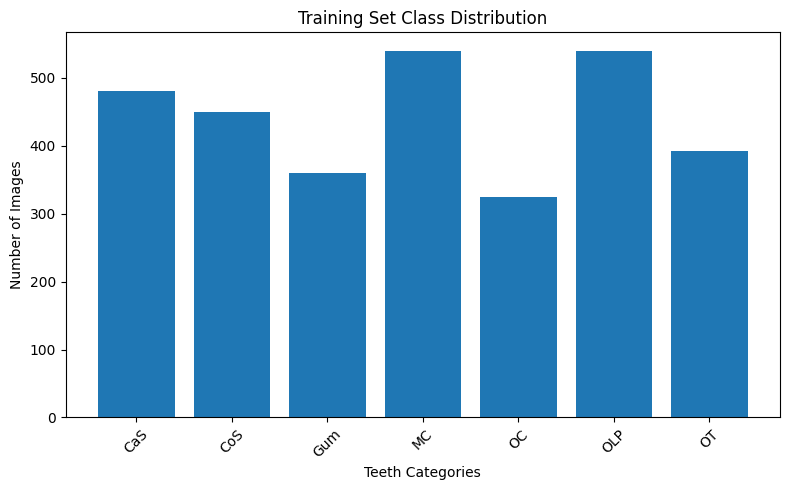

In [ ]:
#visualization

# Class names
labels = list(train_generator.class_indices.keys())

# Count how many samples per class
class_counts = train_generator.classes
unique, counts = np.unique(class_counts, return_counts=True)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, counts)
plt.title("Training Set Class Distribution")
plt.xlabel("Teeth Categories")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
import yaml

# Load your model (YOLOv4-P5 pretrained)
model = YOLO("yolov4-p5.pt")

# Define dataset YAML path
#data_yaml_path = "teeth.yaml"

# Train the model
results = model.train(
    data=data_yaml_path,
    epochs=20,
    imgsz=640,
    batch=16,
    name="yolov4_teeth_7class",
    verbose=True
)

# After training, print validation metrics at each epoch
print("\n=== Validation Metrics (mAP, Precision, Recall) ===")
for i, metrics in enumerate(results.metrics):
    print(f"Epoch {i+1:02d} | "
          f"mAP@0.5: {metrics['metrics/mAP50']:.4f} | "
          f"Precision: {metrics['metrics/precision']:.4f} | "
          f"Recall: {metrics['metrics/recall']:.4f}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


TypeError: ERROR ❌️ yolov4-p5.pt appears to be an Ultralytics YOLOv5 model originally trained with https://github.com/ultralytics/yolov5.
This model is NOT forwards compatible with YOLOv8 at https://github.com/ultralytics/ultralytics.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'